# __Project Part II__
## __Group 13:__ _<small>Coral Marina Jackson, DavidIsaac Marple, Anna Kalea Mills, Sumirpriya Nemani, Arya Tara Oak, Charlie Walker, Erin Yoon</small>_


### __Description of a <u>Integrate and Fire Model </u>:__
An IF model is a simplistic model of neuronal spiking where the input is current, which is integrated until threshold is reached, upon which it fires and is reset. It does not have leakage of current or voltage gated ion channels accounted for. 

#### Integrate and Fire Model Extra Info Links:
You can access the paper here: [Integrate and Fire Paper](https://goldmanlab.faculty.ucdavis.edu/wp-content/uploads/sites/263/2016/07/IntegrateFire.pdf)

### __Code for IF Model__

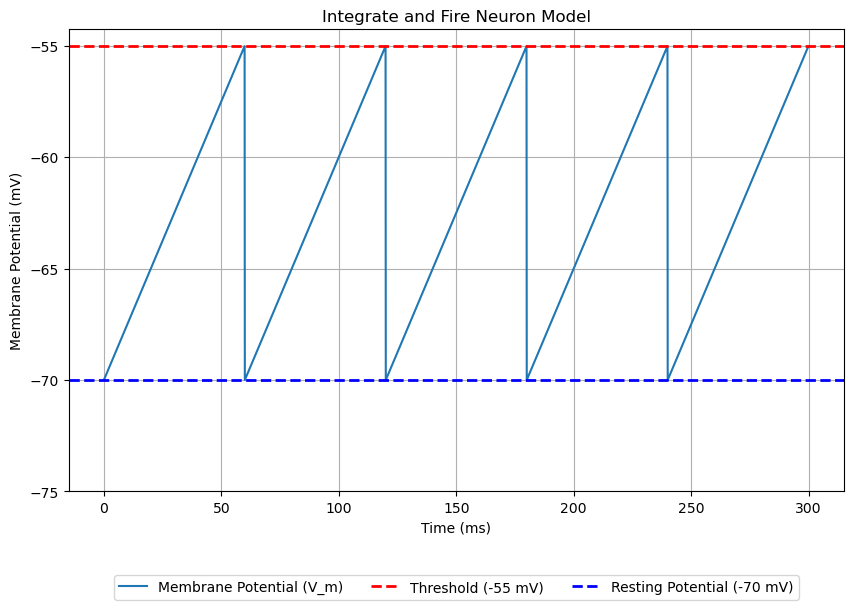

In [119]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
dt = 0.1  # time step (ms)
T = 300   # total simulation time (ms) to allow for more cycles
time = np.arange(0, T, dt)

# Neuron parameters
V_rest = -70  # resting potential (mV)
V_thresh = -55  # threshold potential (mV)
V_reset = V_rest  # Reset to resting potential instead of below it

# Input current
I_ext = 0.25  # Adjusted for approximately 6 cycles

# Initialize membrane potential
V_m = np.full_like(time, V_rest)

# Simulate the model
for t in range(1, len(time)):
    V_m[t] = V_m[t-1] + (I_ext * dt)  # Linear increase

    # Check for spike
    if V_m[t] >= V_thresh:
        V_m[t] = V_reset  # Reset to resting potential after spike

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time, V_m, label="Membrane Potential (V_m)")
plt.axhline(V_thresh, color='r', linestyle='--', label="Threshold (-55 mV)", linewidth=2)
plt.axhline(V_rest, color='b', linestyle='--', label="Resting Potential (-70 mV)", linewidth=2)

# Axis labels and title
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Integrate and Fire Neuron Model")

# Adjust y-axis ticks to include -55 mV
y_ticks = np.arange(min(V_m) - 5, max(V_m) + 5, 5)  # Generate tick marks every 5 mV
if V_thresh not in y_ticks:
    y_ticks = np.append(y_ticks, V_thresh)  # Ensure -55 mV is included
plt.yticks(y_ticks)

# Adjust legend position further below to avoid overlapping with x-axis label
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=3)
plt.grid()
plt.show()

### __What aspect of this model is most unlike a real biological neuron? What is missing? Additionally what aspects are like a biological neuron?__ 
#### __Differences__
* In a biological neuron, when it reaches a threshold, it fires an action potential and then the voltage returns to a resting potential more gradually than in the integrate and fire model.
* The IF model does not account for leaky ion channels, specifically leaky potassium channels
* In the IF model the current is integrated linearly, however in biological neurons current is not linear.
* The IF model also does not account for voltage gated ion channels which are responsible for generating the spikes in a biological neuron
* In a biological neuron, the binding of a neurotransmitter to the synapse opens ligand gated ion channels, which changes the current. In the IF model, the explanation of where input current comes from and how it is generated  is not present
* The linearity in membrane potential increase and immediate resetting once membrane potential is reached as seen in the IF model does not account for the actual intricacies and complexities of membrane potential changes when firing an action potential. It does not show hyperpolarization which occurs in biological neurons
* In a biological neuron, there is decay in current as it passes through the neuron and this model does not have differential decay based on location of the synapse and input current. It also assumes that all ion channels behave identically
#### __Similarities__
* Both IF models and biological neurons can generate spike trains that give insight into the firing frequencies and summation behaviors of neurons
* They both have an all or nothing response after it reaches threshold
* They both integrate and sum inputs  and then decide whether to fire an action potential

### __What was the most challenging aspect of this homework?__
Uploading to GitHub since we don’t have the most practice with using it

#### __How long did it take to complete this homework?__
It took us around 30 minutes to complete this assignment.  

# __Project Part III__

### __Briefly Define the LIF and HH models__
* The LIF or Leaky Integrate and Fire model is a highly simplified computational representation of a neuron. As suggested by its name, it includes the idea that the neuronal membrane potential naturally decays to the resting potential via leaky ion channels (particularly potassium movement). External input current is integrated, increasing the membrane potential and eventually making the model “fire” an action potential once it reaches threshold. 
* The HH or Hodgkin-Huxley model is used to describe the structural and functional properties of ion channels; more specifically, it is used to show each ionic current as the product of each ion’s permeability to the cell membrane and the difference between the membrane potential and the equilibrium potential. In application, it is used to understand the membrane’s behavior in response to the stimulation of different voltage-gated ion channels.


### __Coding and Visualizing the LIF model__

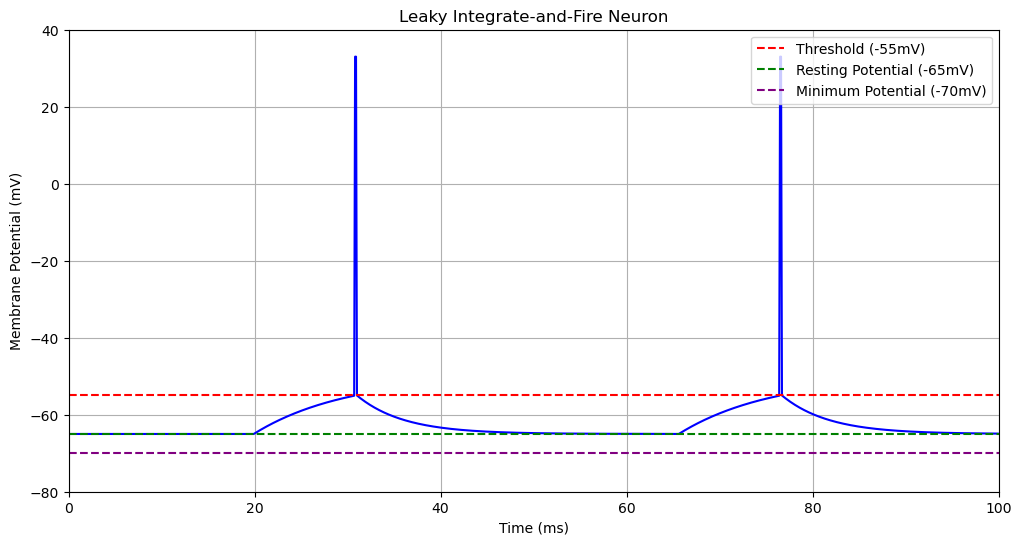

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Neuron parameters
V_rest = -65e-3  # Resting potential (-65 mV)
V_th = -55e-3    # Threshold potential (-55 mV)
V_reset = -70e-3 # Minimum potential (-70 mV)
tau = 10e-3      # Membrane time constant (10 ms)
tau_decay = 5e-3 # Decay time constant (5 ms)
R = 10e6         # Membrane resistance (10 MΩ)
I = 1.5e-9       # Input current (1.5 nA)

# Simulation parameters
dt = 0.1e-3      # Time step (0.1 ms)
t_max = 100e-3   # Total simulation time (100 ms)
t = np.arange(0, t_max, dt)  # Time array

# Initialize membrane potential
V = np.zeros_like(t)
V[0] = V_rest

# State tracking
spike_phase = 0  # 0=normal, 1=spiking, 2=decaying
decay_start_time = 0

# Input current parameters
stim_start = 20e-3  # Stimulation start (20 ms)
stim_end = 80e-3    # Stimulation end (80 ms)

# Simulation loop
for i in range(1, len(t)):
    if spike_phase == 1:
        # Complete the spike by returning to threshold
        V[i] = V_th
        spike_phase = 2
        decay_start_time = t[i]
    elif spike_phase == 2:
        # Exponential decay from threshold to resting potential
        time_since_decay = t[i] - decay_start_time
        V[i] = V_rest + (V_th - V_rest) * np.exp(-time_since_decay/tau_decay)
        
        # Check if decay is complete
        if V[i] <= V_rest + 1e-5:  # Threshold for completion
            V[i] = V_rest
            spike_phase = 0
    else:
        # Normal operation
        # Check stimulation current
        if stim_start <= t[i] < stim_end:
            I_current = I
        else:
            I_current = 0
        
        # Update membrane potential
        dV = ((V_rest - V[i-1]) + I_current * R) / tau * dt
        V[i] = V[i-1] + dV
        
        # Check for spike threshold
        if V[i] >= V_th:
            # Create vertical spike (current and previous points to 33mV)
            V[i-1] = 33e-3
            V[i] = 33e-3
            spike_phase = 1
    
    # Enforce minimum potential
    if V[i] < V_reset:
        V[i] = V_reset

# Convert units for plotting
t_plot = t * 1e3  # Convert to milliseconds
V_plot = V * 1e3  # Convert to millivolts

# Create plot
plt.figure(figsize=(12, 6))
plt.plot(t_plot, V_plot, color='blue')
plt.axhline(y=V_th*1e3, color='red', linestyle='--', label='Threshold (-55mV)')
plt.axhline(y=V_rest*1e3, color='green', linestyle='--', label='Resting Potential (-65mV)')
plt.axhline(y=V_reset*1e3, color='purple', linestyle='--', label='Minimum Potential (-70mV)')
plt.title('Leaky Integrate-and-Fire Neuron')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.ylim(-80, 40)
plt.xlim(0, t_max*1e3)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

### __Looking at our Model with Differing Inputs__
Below we have our code for the LIF model with not enough inputs to reach threshold

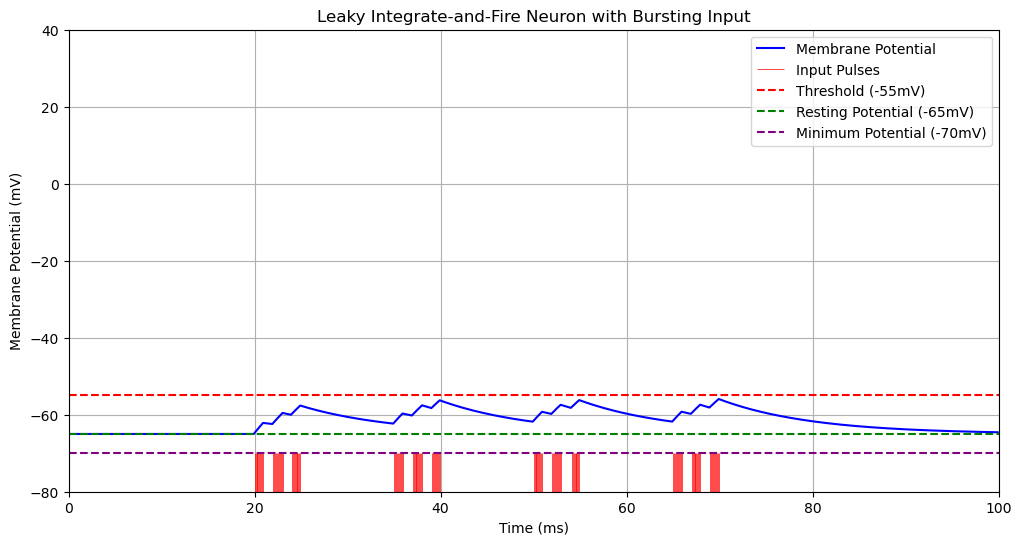

In [128]:
import numpy as np
import matplotlib.pyplot as plt

# Neuron parameters
V_rest = -65e-3  # Resting potential (-65 mV)
V_th = -55e-3    # Threshold potential (-55 mV)
V_reset = -70e-3 # Minimum potential (-70 mV)
tau = 10e-3      # Membrane time constant (10 ms)
tau_decay = 5e-3 # Decay time constant (5 ms)
R = 10e6         # Membrane resistance (10 MΩ)
I = 3e-9         # Increased input current for bursting (3 nA)

# Simulation parameters
dt = 0.1e-3      # Time step (0.1 ms)
t_max = 100e-3   # Total simulation time (100 ms)
t = np.arange(0, t_max, dt)  # Time array

# Bursting input parameters
burst_start = 20e-3  # First burst start time (20 ms)
burst_end = 80e-3    # Last burst end time (80 ms)
burst_interval = 15e-3  # Time between burst starts (15 ms)
burst_duration = 5e-3  # Duration of each burst (5 ms)
pulse_duration = 1e-3  # Duration of each pulse in burst (1 ms)
pulse_interval = 1e-3  # Interval between pulses in burst (1 ms)

# Initialize membrane potential
V = np.zeros_like(t)
V[0] = V_rest

# State tracking
spike_phase = 0  # 0=normal, 1=spiking, 2=decaying
decay_start_time = 0

# Generate burst times
burst_times = []
current_burst = burst_start
while current_burst + burst_duration <= burst_end:
    burst_times.append((current_burst, current_burst + burst_duration))
    current_burst += burst_interval

# Simulation loop
for i in range(1, len(t)):
    # Check for bursting input
    I_current = 0
    for burst_start, burst_end in burst_times:
        if burst_start <= t[i] < burst_end:
            # Calculate time since burst started
            t_since_burst = t[i] - burst_start
            # Check if in active pulse period
            pulse_phase = t_since_burst % (pulse_duration + pulse_interval)
            if pulse_phase < pulse_duration:
                I_current = I
    
    if spike_phase == 1:
        # Complete the spike by returning to threshold
        V[i] = V_th
        spike_phase = 2
        decay_start_time = t[i]
    elif spike_phase == 2:
        # Exponential decay from threshold to resting potential
        time_since_decay = t[i] - decay_start_time
        V[i] = V_rest + (V_th - V_rest) * np.exp(-time_since_decay/tau_decay)
        
        # Check if decay is complete
        if V[i] <= V_rest + 1e-5:  # Threshold for completion
            V[i] = V_rest
            spike_phase = 0
    else:
        # Update membrane potential
        dV = ((V_rest - V[i-1]) + I_current * R) / tau * dt
        V[i] = V[i-1] + dV
        
        # Check for spike threshold
        if V[i] >= V_th:
            # Create vertical spike (current and previous points to 33mV)
            V[i-1] = 33e-3
            V[i] = 33e-3
            spike_phase = 1
    
    # Enforce minimum potential
    if V[i] < V_reset:
        V[i] = V_reset

# Convert units for plotting
t_plot = t * 1e3  # Convert to milliseconds
V_plot = V * 1e3  # Convert to millivolts

# Create plot
plt.figure(figsize=(12, 6))
plt.plot(t_plot, V_plot, color='blue', label='Membrane Potential')
plt.title('Leaky Integrate-and-Fire Neuron with Bursting Input')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')

# Add input current visualization
input_signal = np.zeros_like(t)
for i in range(len(t)):
    for burst_start, burst_end in burst_times:
        if burst_start <= t[i] < burst_end:
            t_since_burst = t[i] - burst_start
            pulse_phase = t_since_burst % (pulse_duration + pulse_interval)
            if pulse_phase < pulse_duration:
                input_signal[i] = 1

plt.eventplot([t_plot[input_signal == 1]], colors=['red'], lineoffsets=-75, 
              linelengths=10, linewidths=0.5, label='Input Pulses')

plt.axhline(y=V_th*1e3, color='red', linestyle='--', label='Threshold (-55mV)')
plt.axhline(y=V_rest*1e3, color='green', linestyle='--', label='Resting Potential (-65mV)')
plt.axhline(y=V_reset*1e3, color='purple', linestyle='--', label='Minimum Potential (-70mV)')
plt.ylim(-80, 40)
plt.xlim(0, t_max*1e3)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

### __Comparing the Models__
The image below shows the two models. On the left we have the original and on the right we have the modified input visualization where the inputs are not enough to reach threshold. We made the following changes to our original code: 
#### Input current visualization in the new code: 
“input_signal = np.zeros_like(t)
for i in range(len(t)):
    for burst_start, burst_end in burst_times:
        if burst_start <= t[i] < burst_end:
            t_since_burst = t[i] - burst_start
            pulse_phase = t_since_burst % (pulse_duration + pulse_interval)
            if pulse_phase < pulse_duration:
                input_signal[i] = 1
plt.eventplot([t_plot[input_signal == 1]], colors=['red'], lineoffsets=-75, 
              linelengths=10, linewidths=0.5, label='Input Pulses')”
#### Burst times generation:
“burst_times = []
current_burst = burst_start
while current_burst + burst_duration <= burst_end:
    			burst_times.append((current_burst, current_burst + burst_duration))
   			 current_burst += burst_interval”
#### Input current application
Before: 
"if stim_start <= t[i] < stim_end:
   		 I_current = I
else:
   		 I_current = 0"

After: 
"I_current = 0
for burst_start, burst_end in burst_times:
    if burst_start <= t[i] < burst_end:
        t_since_burst = t[i] - burst_start
        pulse_phase = t_since_burst % (pulse_duration + pulse_interval)
        if pulse_phase < pulse_duration:
            I_current = I"
#### Input current parameters:
Before: 
"I = 1.5e-9       # Input current (1.5 nA)
stim_start = 20e-3  # Stimulation start (20 ms)
stim_end = 80e-3    # Stimulation end (80 ms)"

After:
"I = 3e-9         # Increased input current for bursting (3 nA)
burst_start = 20e-3  # First burst start time (20 ms)
burst_end = 80e-3    # Last burst end time (80 ms)
burst_interval = 15e-3  # Time between burst starts (15 ms)
burst_duration = 5e-3  # Duration of each burst (5 ms)
pulse_duration = 1e-3  # Duration of each pulse in burst (1 ms)
pulse_interval = 1e-3  # Interval between pulses in burst (1 ms)"

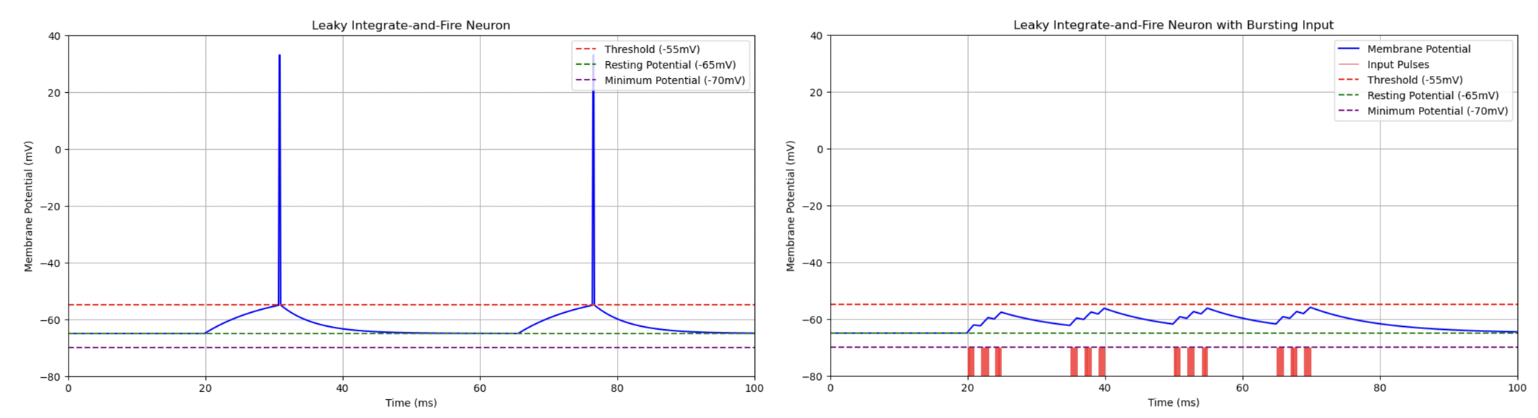

### __Questions__
#### __What changes had to be made to update the model and why?__
* The main changes that were made to update the model were to change the input current from a continuous current to a bursting current. This was done in order to see how the model handled a changing current and to show how the bursting inputs impacted whether or not an action potential was fired.

#### __How did you and/or ChatGPT implement the changes?__ 
* It implemented the changes by producing the parts of the code that would account for the parameters of the input burst as well as the input current visualization and the burst times generation which is unique to the changed code.
  
* __Input current visualization in the new code:__
“input_signal = np.zeros_like(t)
for i in range(len(t)):
    for burst_start, burst_end in burst_times:
        if burst_start <= t[i] < burst_end:
            t_since_burst = t[i] - burst_start
            pulse_phase = t_since_burst % (pulse_duration + pulse_interval)
            if pulse_phase < pulse_duration:
                input_signal[i] = 1
plt.eventplot([t_plot[input_signal == 1]], colors=['red'], lineoffsets=-75, 
              linelengths=10, linewidths=0.5, label='Input Pulses')”
  
* __Burst times generation:__
		“burst_times = []
current_burst = burst_start
while current_burst + burst_duration <= burst_end:
    			burst_times.append((current_burst, current_burst + burst_duration))
   			 current_burst += burst_interval”
* __Additionally the input current application in the simulation loop is slightly different from the original code:__
“I_current = 0
for burst_start, burst_end in burst_times:
    if burst_start <= t[i] < burst_end:
        t_since_burst = t[i] - burst_start
        pulse_phase = t_since_burst % (pulse_duration + pulse_interval)
        if pulse_phase < pulse_duration:
            I_current = I”

#### __Define 'bits' and Shannon's entropy with relation to information theory. Which model contains the most bits? Which model has the highest Shannon's entropy? Explain your answer.__
* Bits are a unit of information. It is a way to predict uncertainty in a situation. One bit is the amount of information needed to separate two equally likely outcomes from each other. Shannon’s entropy refers to the amount of uncertainty involved in a random variable or process. If a process has a high Shannon’s entropy, that means that there is a lot of uncertainty in that process, so it requires a large number of bits to reach some outcome in the process. More information is needed to eliminate uncertainty in a process with high Shannon’s entropy. The LIF model with the bursting inputs contains the most bits, and thus has a higher Shannon’s entropy than our standard LIF model. This is because there is more uncertainty in the model with bursting inputs. In the standard LIF model, the only uncertainty is in whether or not an input will be received. If an input is received, then the neuron will fire. However, in the model with the bursting input, it is uncertain whether or not multiple inputs will be received and whether or not these inputs will sum together to reach threshold and get the neuron to fire. More bits are needed to determine whether or not the neuron will fire, so there is a higher Shannon’s entropy.


### __Reflection__
#### __Did you encounter any problems?__
* We had difficulty finding a time that worked for all seven members of our group to work in tandem, so we decided to split into two groups. For this purpose, GitHub came in very handy as the first group was able to pass along their progress on the homework to the second group through our shared repository.
#### __How did you overcome them? Or are you still unable to make it work?__
* Both groups met virtually over Zoom, so one member of each group opened the JupyterNotebook via Anaconda and shared their screen. This way, all members of the group could see coding progress in real time. We tried to work collaboratively through GitHub, but the virtual format of our meetings made this difficult. We edited and transferred code between groups through GitHub but wrote reflections in a shared Google Doc. 